We start wih the basics as always.

## 1. Singular Value Decomposition

Any matrix $A$ can be factorized as

$$A = U\, \Sigma \, V^T\, \ldots (1)$$

Where $U, V^T$ are orthogonal matrices (transpose equals the inverse) and $\Sigma$ would be diagonal matrix. $A$ need not be a square matrix, say it's a $N\times D$ matrix so we can already think of this as our data matrix with $N$ instances and $D$ features. $U, V$ are square matrices $(N \times N)$ and $(D\times D)$ respectively, and $Σ$ will then be a $N\times D$ matrix where $D \times D$ subset will be diagonal and remaining entries will be zero.

The elements on the diagonals of the diagonal matrix $\Sigma$ would be called as _Singular Values_.

We also know Eigenvalue decomposition. Given a square matrix $(B)$ which is diagonalizable can be factorized as

$$B = QΛQ^{-1}\, \ldots (2)$$

where $Q$ is the square $N × N$ matrix whose $i$th column is the eigenvector $q_i$ of $B$, and $Λ$ is the diagonal matrix whose diagonal elements are the corresponding eigenvalues, $Λ_{ii} = λ_i$.

Let's try to modify the equation (1) a bit by multiplying it with $A^T$.

$$\begin{equation} A^TA  = \left(V Σ U^T\right)\, (U \Sigma ^T V^T) = V(\Sigma \Sigma ^T) V^T\end{equation} \, \ldots (3)$$

Now we see an uncanny similarity between (1), (2) and (3).

Here, $A^TA$ would be a Square matrix even though $A$ initially didn't need to be (could be $m\times n$). $\Sigma Σ^T$ is a diagonal matrix and $V^T = V^{-1}$ from the definition. Now this is basically eigendecomposition of a matrix $A^TA$. The eigenvalues say $\sigma $'s here are square of the singular values for A in eq. (1).


Given a matrix $A$, how we will proceed to find the SVD. Let's go step by step and we will use some programming tools for the calculation.


Let's take an example $$A = \begin{bmatrix}-4 & 6 \\
3 & 8 \end{bmatrix}$$

1. First find the $A^T\, A$, diagonalize to find the orthinormal basis of eigenvectors $\{v_1, \ldots \, v_n\}$.

  Ex: The $A^T \, A$ turned out to be
  $$A^T\, A = \begin{bmatrix}25 & 0 \\
  0 & 100 \end{bmatrix}$$

2. After this, we calculate the eigenvalues (for diagonal matrix these are just the diagonal elements), we reorder the eigenvectors $(v_i)$ corresponding to the highest eigenvalues $(\lambda _i)$.

  Ex: Continuting with the above calculation, the two eigenvalues are 100 and 25 and corresponding eigenvectors are $\begin{bmatrix}0 \\ 1 \end{bmatrix}$ and $\begin{bmatrix}1 \\ 0 \end{bmatrix}$.

3. We know from theory that eigenvalues of $A^T\, A$ are square of the singular values of the $A$, so $\sigma_1 = 10, \sigma_2 = 5$.

4. Then we define $u_i = \frac{1}{\sigma _i} A v_i$.

  Ex: In our example: $u_1 = \frac{1}{5} \begin{bmatrix} 3\\ 4 \end{bmatrix}\, $, and $u_2 = \frac{1}{5} \begin{bmatrix} -4\\ 3 \end{bmatrix}\, $,

5. After this we have everything:
$$V = \begin{bmatrix} 0 & 1 \\ 1 & 0\end{bmatrix}, \, Σ = \begin{bmatrix} 10 & 0 \\ 0 & 5\end{bmatrix}, \, U = \frac{1}{5}\begin{bmatrix} 3 & -4 \\ 4 & 3\end{bmatrix}$$.

  Be very careful to check the ordering of the columns in $v_i, \sigma _i, u_i$.

6. We can always verify: $A = U \Sigma V^T$.


### Note: SVD, Eigen Decomposition and PCA

For positive semi-definite matrix SVD and Eigen Decomposition are equivalent.

PCA boils down to Eigen decomposition of the covariance matrix. Finding the maximum eigenvalue(s) and corresponding eigenvector (s) are basically then can be thought of finding the direction of maximum variance.

Given $D$ dimensional data (features), a full Eigen Decomposition would be expensive $\sim \mathcal{O}\left(D^3 \right)$, but now if we choose some latent space dimension $M (\lt D)$ then the calculation is cheaper $\sim\mathcal{O}(MD^2)$.

-------------------------------------------------------------

## 2. Multivariate Gaussian

Let's take a slight detour and get accustomed with some formulas for Multivariate Gaussian before we use them more in next section:

Let $x_1, \, x_2 \in \mathbb{R}$ are 2 independent random variables following normal distributions $x_1\sim \mathcal{N}\left(\mu _1, \, \sigma _1^2\right)$, $x_2\, \sim N\left(\mu _2,\, \sigma_2^2\right)$. The joint distribution would be given as:

$$p\left(x_1, \, x_2\right) = p\left(x_1\right)\, p\left(x_2\right) = {\frac{1}{\sqrt{2\pi \sigma _1^2}}}\, e^{-\frac{(x_1-\mu_1)^2}{2\sigma _1^2}}\, {\frac{1}{\sqrt{2\pi \sigma _2^2}}}\, e^{-\frac{(x_2-\mu_2)^2}{2\sigma _2^2}}\, \ldots (1)$$

From here, we can simplify the equation

$$p\left(x_1, \, x_2\right) = \frac{1}{2\pi ^{(2/2)}\, (\sigma_1^2\sigma_2^2)^{1/2}}\, e^{-\frac{(x_1 - \mu _1)^2}{2\sigma _1^2} - \frac{(x_2 - \mu _2)^2}{2\sigma _2^2}}\, \ldots (2)$$


We can further simplify the expression above. Let's define:

$$x = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}, \, \mu = \begin{pmatrix} \mu_1 \\ \mu_2 \end{pmatrix},\, \Sigma = \begin{pmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_2^2 \end{pmatrix}\rightarrow \Sigma^{-1} = \begin{pmatrix} \frac{1}{\sigma_1^2} & 0 \\ 0 & \frac{1}{\sigma_2^2} \end{pmatrix} \, \ldots (3)$$.

As $x_1, x_2$ are independent we know that $\Sigma$ is a covariance matrix, $\Sigma = Cov(x)$.

Using the above definitions from Eq. (3), we can write

$$ (x-\mu)^{T}\, \Sigma^{-1}\, (x-\mu) = \begin{pmatrix} \frac{x_1-\mu _1}{\sigma _1^2}, \, \frac{x_1-\mu _1}{\sigma _1^2}\, \end{pmatrix}\, \begin{pmatrix} x_1-\mu _1 \\ x_1 - \mu _2 \end{pmatrix} = \frac{(x_1-\mu _1)^2}{\sigma _1^2} + \frac{(x_2-\mu _2)^2}{\sigma _2^2}\, \ldots (4)$$

Using Eq. (4), we can further simplify Eq. (2):

$$p\left(x_1, \, x_2\right) = \frac{1}{2\pi ^{(2/2)}\, {\text{det}\, \Sigma}^{1/2}}\, e^{-\frac{(x-\mu)^T\, \Sigma ^{-1}\, (x-\mu)} {2}}$$


This is why we often see the $n$-dimensional multivariate distribution is written as

$$p\left(x;\, \mu , \, \Sigma \right) = \frac{1}{2\pi ^{(n/2)}\, {\text{det}\, \Sigma}^{1/2}}\, \text{exp}\, \left({-\frac{(x-\mu)^T\, \Sigma ^{-1}\, (x-\mu)} {2}} \right)$$


For any random vector $X$ with mean $\mu$ and covariance matrix $\Sigma$:

$$\Sigma = E\left[(X-\mu)\, (X-\mu)^T\right] = E\left[XX^T\right] - \mu \mu ^T$$

--------------------------------------------------------

## 3. Probabilistic PCA

Probabilistic PCA is a Latent Variable Model (LVM) and we've discussed LVM in [detail before](https://towardsdatascience.com/latent-variables-expectation-maximization-algorithm-fb15c4e0f32c) including the Expectation-Maximization (EM) algorithm.



LVMs offer a low dimensional representation of the data. Let's say our data $(x)$ is $\left(N\times D\right)$ dimensional, with $D$ features, LVM seeks an $M$ dimensional latent vector of unobserved variables $z$ and they are related via a linear relationship as below:

$$x = Wz + \mu + \epsilon\, \ldots (1)$$

$$\text{if}\, \mu = 0; \rightarrow x = Wz + \epsilon\,$$

There's an excellent pictorial representation of the process given in [Bishop's Pattern Recognition](https://link.springer.com/book/9780387310732) book as below:

![bishopPPCA](https://drive.google.com/uc?id=1wipKkSzG4E76tR-kutz7CVVovrdDAu0r)

Here, we think for simplicity that our data-set has only 2 dimensions $(x_1, x_2)$. Then an observed datapoint $x_i$ could be thought of as generated by first drawing a variable $z_i$ from an 1-D latent space with a prior distribution $p(z)$ and then drawing a value for $x$ from an isotropic Gaussian distribution (red circles) with mean $wz_i + \mu $ and  covariance $\sigma^2 \text{I}$. The green ellipses are the contours for the marginal distribution $p(x)$.


If we look back at Eqn. (1) of this section then we can easily obtain the necessary dimensions for the $W, \mu, ϵ$. We already know our latent space is $M$ dimensional, $\mu$ is a continuous $D$ dimensional vector, for the noise $ϵ$, which is a $D$ dimensional vector with a zero mean Gaussian and covariance with $\sigma^2 \text{I}$; this leaves our $W$ vector to be $D \times M$ dimensional. The columns of $W$ spans a linear subspace within the data space, that corresponds to principal subspace.

\

#### 3.1. _Assumptions_:

1. The independent noise is Gaussian (Zero mean and covariance $\sigma^2 \text{I}$):

$$p(ϵ) = \mathcal{N}\left(ϵ|0, \sigma ^2\, I \right)\, \ldots (2)$$

2. The latent variable $z$ also assumed to have a Gaussian Prior (Zero mean and unit covariance), $p(z)$:

$$p(z) = \mathcal{N} \left(z|0, I\right)\, \ldots (3)$$

These lead to the conditional distribution:

$$p(x|z) = \mathcal{N}(x|Wz + \mu, \sigma ^2 \text{I})\, \ldots (4)$$

$$\text{if} \, \mu = 0; \, p(x|z) = \mathcal{N}(x|Wz ,\,  \sigma ^2 \text{I})$$

The above equation should remind us of a fundamental property of a normal distribution: if $x$ follows multivariate normal distribution i.e. $x\sim \mathcal{N}(\mu, \Sigma)$, then any linear transformation of $x$ is also multivariate normal $y = Ax + b \sim \mathcal{N}\left(A\mu + b, A\Sigma A^T\right)$

Given the joint distribution, the marginal distribution would also be Gaussian

$$p(x) = \mathcal{N}(\mu, \, \mathbb{C}); \, \mathbb{C} = WW^T + \sigma ^2 \text{I}\, \ldots (5)$$

$\mathbb{C}$ is a $D\times D$ covariance matrix.

As we would like to determine the parameters $W, \, \mu, \, \sigma$, we can approach via MLE or EM algorithm. Here we will focus on EM approach. Both approaches are well described in Bishop's book. Bishop's argue that as the data dimensionality increases, we may gain computational advantages over MLE via iterative EM steps. This has to do with mainly the computational cost of the covariance matrix, where evaluation of $D$ dimensional data covariance matrix takes $\mathcal{O}\left(ND^2\right)\, N$, being the number of data points.

\

#### 3.2. _EM Steps (PPCA)_

1. In the expectation step, we calculate the expectation of the complete data log-likelihood w.r.t its posterior distribution of the latent distribution evaluated using the 'old' parameters.

2. Maximizing this data log-likelihood yields 'new' parameters which will be plugged into step 1.




----------------------------------------------------

As the data points are independent the complete data likelihood would be:

$$\ln p\left(X, Z| \mu , \, W, \, \sigma ^2\right) = \sum \limits_{n=1}^N \, \ln p(x_n|z_n) + \ln p(z_n)\, \ldots (6)$$

The main target for E-step is to calculate the expectation of the expression above. Here we have to use $p(x|z),\, p(z)$ from equations 3 and 4 respectively in section 3. The derivation is given in Bishop's book but the important part is that the derivation requires calculation of $\mathbb{E}[z_n], \, \mathbb{E}[z_n\, z_n^T], $ and, this can be derived using the posterior distribution $p(z|x)$.

Once the E-step is done, the M-step then involves maximizing this expected log-likelihood w.r.t the parameters $W, \sigma ^2$.

The full probabilistic approach gives us the capability to deal with missing values.

\

---------------------------------------------------

### 4. Variational Inference, EM & ELBO

The EM steps described above depend on a certain crucial assumption that the posterior distribution $p(z|x)$ is tractable (necessary for the E step in eq. 6). _What if that's not the case?_ What if there's not any analytic expression for the posterior (An anlytic expression is given in Bishop's book Eq. 12.42)?

We now take help from variational methods. The main idea is that we try to find a distribution $q(z)$ that can be as close as the posterior distribution $p(z|x)$. These approximation distribution can have their own variational parameters: $q(z|θ)$, and we try to find the setting of the parameters that make $q$ close to the posterior of interest. $q(Z)$ should be relatively easy and more tractable for inference.

To measure the closeness of the two distribution $q(z)$ and $p(z|x)$, a common metric is the Kullback-Leibler (KL) divergence. The KL divergence for variational inference is:

$$\begin{equation} \begin{split} KL\left[q(z)|| p(z|x)\right] &= \int q(z)\, \log \, \frac{q(z)}{p(z|x)} dz \\ &= -\int q(z)\, \log \, \frac{p(z|x)}{q(z)} dz \\ &=  -\int q(z)\, \log \, \frac{p(x, z)}{p(x)\, q(z)} dz \, ;\, \text{Bayes' Theorem} \\ &=  -\int q(z)\, \log \, \frac{p(x, z)}{q(z)} dz + \int q(z)\, \log \, p(x) dz \\ &= \underbrace{-\mathbb{E}_q \left[\log p(x, z)\right]\, +\mathbb{E}_q \left[\log q(z)\right]\,}_{-\text{ELBO}(q)} + \log p(x)\end{split}\end{equation} \, \ldots (1)$$

Using the definition of Evidence Lower BOund (ELBO), we rewrite the above expression:

$$\log p(x) = \text{ELBO}\,(q) + KL\left[q(z)|| p(z|x)\right] \, \ldots (2)$$

where,

$$\text{ELBO}(q) = \mathbb{E}_q \left[\log p(x, z)\right]\, -\mathbb{E}_q \left[\log q(z)\right]\,$$

Since KL divergence is non-negative, $\log p(x) \geq \text{ELBO}\,(q)$. So what we do in Variational Inference (VI) is that we maximize the ELBO.

We can also easily see the connection between VI and  traditional EM algorithm, when $q(x)== p(z|x)$ as the KL divergence term vanishes.



In [ ]:
import numpy as np

In [ ]:
A = np.array([[-4, 6], [3, 8]])
print (A)

A_T = A.transpose()

print ('Step 1')
print ('Transpose of A: ', A_T)
print ('!!!!!!!!!!!!!!!!!')
print ('!!')
print ('!!!!!!!!!!!!!!!!!')
print ('Original A: ', A)

print ('Step 2')
print ('!!!!!!!!!!!!!!!')
A_T_m_A = np.matmul(A_T, A)
print ('A^T multiplied with A: ', A_T_m_A)
w, v = np.linalg.eig(A_T_m_A)
print ('check the eigen values: ', w)
print ('\n')
print ('check the eigenvectors: ', v)

print ('Step 3: ')
print ('!!!!!!!!!!!!!!!!')

## we reorder the eigenvectors corresponding to the highest eigenvalues

u_2 = (1/np.sqrt(w[1])) * np.matmul(A, v[:, 1])
print ('1st important eigenvector: ', '\n', u_2)

u_1 = (1/np.sqrt(w[0])) * np.matmul(A, v[:, 0])
print ('wnd important eigenvector: ', '\n', u_1)

print ('Step 4 & Verification : ')

### let's construct the factor matrices: U, V, Sigma

U = np.array([[0.6, -0.8], [0.8, 0.6]])
V = np.array([[0, 1], [1, 0]])
Sigma = np.array([[10, 0], [0, 5]])
print ('U, V, and Sigma: ','\n', U, '\n', V, '\n', Sigma)

US=np.matmul(U, Sigma)
USV_T = np.matmul(US, V.transpose())

print ('check if USV^T is indeed A', '\n', USV_T )
print ('equality test: ', np.array_equal(A, USV_T))

[[-4  6]
 [ 3  8]]
Step 1
Transpose of A:  [[-4  3]
 [ 6  8]]
!!!!!!!!!!!!!!!!!
!!
!!!!!!!!!!!!!!!!!
Original A:  [[-4  6]
 [ 3  8]]
Step 2
!!!!!!!!!!!!!!!
A^T multiplied with A:  [[ 25   0]
 [  0 100]]
check the eigen values:  [ 25. 100.]


check the eigenvectors:  [[1. 0.]
 [0. 1.]]
Step 3: 
!!!!!!!!!!!!!!!!
1st important eigenvector:  
 [0.6 0.8]
wnd important eigenvector:  
 [-0.8  0.6]
Step 4 & Verification : 
U, V, and Sigma:  
 [[ 0.6 -0.8]
 [ 0.8  0.6]] 
 [[0 1]
 [1 0]] 
 [[10  0]
 [ 0  5]]
check if USV^T is indeed A 
 [[-4.  6.]
 [ 3.  8.]]
equality test:  True


### Probabilistic PCA with TensorFlow

Based on the Original Turorial:  Available [Here](https://www.tensorflow.org/probability/examples/Probabilistic_PCA)

In [1]:
import functools
import warnings

import matplotlib.pyplot as plt
import numpy as np


import tensorflow as tf
import tensorflow_probability as tfp

tfb = tfp.bijectors
tfd = tfp.distributions


warnings.filterwarnings('ignore')

The assumption here is that let's assume we already know the standard deviation $(\sigma^2)$ of the noise $ϵ$ and we want to estimate the $W$. But we don't point estimate $W$ and instead approach via VI to get an approximate distribution.  

In [2]:

num_datapoints = 5000
data_dim = 2
latent_dim = 1
stddv_datapoints = 0.4




def probabilistic_pca_tf(data_dim, latent_dim, num_datapoints, stddv_datapoints):
  w = yield tfd.Normal(loc=tf.zeros([data_dim, latent_dim]),
                       scale=3 * tf.ones([data_dim, latent_dim]), name="w")

  z = yield tfd.Normal(loc=tf.zeros([latent_dim, num_datapoints]),
                       scale=tf.ones([latent_dim, num_datapoints]), name="z")

  x = yield tfd.Normal(loc=tf.matmul(w, z), scale=stddv_datapoints, name="x")

concrete_ppca_model = functools.partial(probabilistic_pca_tf,
                                        data_dim=data_dim,
                                        latent_dim=latent_dim,
                                        num_datapoints=num_datapoints,
                                        stddv_datapoints=stddv_datapoints)


tf_model = tfd.JointDistributionCoroutineAutoBatched(concrete_ppca_model)




print ('what is tf model: ', type(tf_model))

what is tf model:  <class 'tensorflow_probability.python.distributions.joint_distribution_auto_batched.JointDistributionCoroutineAutoBatched'>


`tfp.distributions.JointDistributionCoroutineAutoBatched`

This class is an "auto-batched" version of `JointDistributionCoroutine`.
    
It automatically applies batch semantics to the joint distribution based on the shape of the input arguments.
    
It allows for more flexible handling of batch dimensions.

We can pass batched or unbatched arguments to the joint distribution, and it will handle the batch semantics automatically.

If we want to use `JointDistributionCoroutine` then we need to specify the `batch_shape` explicitly.


`JointDistributionCoroutine` allows one to define joint probability distributions using a generator function (coroutine).

This generator function yields TFP distribution instances one by one, specifying the dependencies between variables in the joint distribution.

Each yield statement corresponds to one variable in the joint distribution. The order and dependencies are determined by the generator function's structure.


More on the [`JointDistributionCoroutine`](https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/JointDistributionCoroutine) in the TensorFlow page.

In [ ]:
#print (next(ppca_model))

In [3]:
true_w, true_z, x_train = tf_model.sample()

print("Principal axes:")
print(true_w, )
print ('\n', )

print ('what about z: ')
print ('\n')
print ('z: ', true_z)

print ('what about x: ')
print ('\n')
print ('x: ', x_train.shape)




Principal axes:
tf.Tensor(
[[ 1.5340817]
 [-0.7753728]], shape=(2, 1), dtype=float32)


what about z: 


z:  tf.Tensor(
[[-0.5522628  -1.2633774   1.1011274  ...  0.220829   -0.48281425
   0.8130725 ]], shape=(1, 5000), dtype=float32)
what about x: 


x:  (2, 5000)


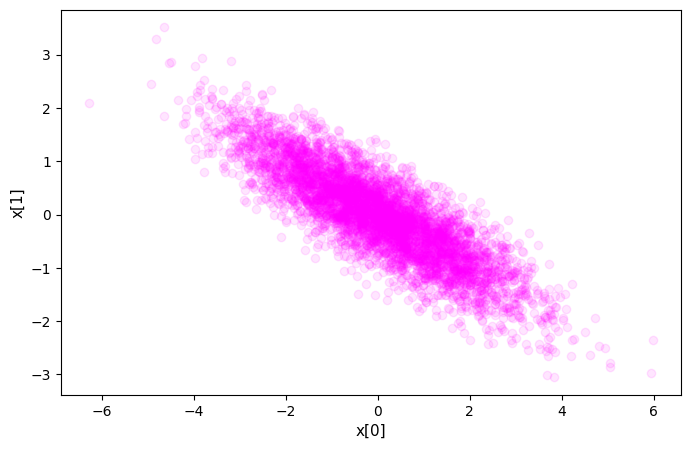

In [4]:
fig = plt.figure(figsize=(8, 5))
plt.scatter(x_train[0, :], x_train[1, :], color='magenta', alpha=0.1)
plt.xlabel('x[0]', fontsize=11)
plt.ylabel('x[1]', fontsize=11)
plt.show()

### Proceed Via Variational Inference


We try to think that the posterior $p(W, Z|X)$ can be approximated by a simpler distribution $q(W, Z)$ parameterized by $\theta$. In VI our aim is to minimize the KL divergence between $q(W, Z)$ and $p(W, Z|X)$, which on the other hand from equation (4.1, 4.2) would be to maximize the Evidence Lower Bound (ELBO).

The ELBO in this case:

$$\mathbb{E}_{q(w, Z; \theta)} \left[\log p(W, Z, X) - \log q(W, Z; \theta)  \right] $$

In [5]:
# initialize w, z as random variables
w = tf.Variable(tf.random.normal([data_dim, latent_dim]))
z = tf.Variable(tf.random.normal([latent_dim, num_datapoints]))


target_log_prob_fn_tf = lambda w, z: tf_model.log_prob((w, z, x_train)) # complete data log-likelihood

qw_mean = tf.Variable(tf.random.normal([data_dim, latent_dim]))
qz_mean = tf.Variable(tf.random.normal([latent_dim, num_datapoints]))

qw_stddv = tfp.util.TransformedVariable(1e-4 * tf.ones([data_dim, latent_dim]),
                                        bijector=tfb.Softplus()) # softplus ensures the output to be positive
### this is similar to the TransformedDistribution used before, instead of distribution object, it returns a variable

print ('check qw_stddev: ', type(qw_stddv), qw_stddv)

qz_stddv = tfp.util.TransformedVariable(1e-4 * tf.ones([latent_dim, num_datapoints]),
                                        bijector=tfb.Softplus())


check qw_stddev:  <class 'tensorflow_probability.python.util.deferred_tensor.TransformedVariable'> <TransformedVariable: name=softplus, dtype=float32, shape=[2, 1], fn="softplus", numpy=
array([[0.0001],
       [0.0001]], dtype=float32)>


`TransformedVariable` can be useful when we need to apply a transformation to a TensorFlow variable while keeping track of its transformed value. It enables us to work with the transformed variable directly, as opposed to performing the transformation separately in each computation step.

It's important to note that `TransformedVariable` is not a distribution.
It is a wrapper around a TensorFlow variable that applies a specified transformation.

In [6]:

def factored_normal_variational_model():
  qw = yield tfd.Normal(loc=qw_mean, scale=qw_stddv, name="qw")
  qz = yield tfd.Normal(loc=qz_mean, scale=qz_stddv, name="qz")


# like before we define a joint distribution
surrogate_posterior = tfd.JointDistributionCoroutineAutoBatched(factored_normal_variational_model) # joint distribution q(w, z)


print ('what is surrogate posterior? ', '\n', surrogate_posterior)

what is surrogate posterior?  
 tfp.distributions.JointDistributionCoroutineAutoBatched("JointDistributionCoroutineAutoBatched", batch_shape=[], event_shape=StructTuple(
  qw=[2, 1],
  qz=[1, 5000]
), dtype=StructTuple(
  qw=float32,
  qz=float32
))


In [7]:
### minimize elbo

losses_tf = tfp.vi.fit_surrogate_posterior(target_log_prob_fn_tf, surrogate_posterior=surrogate_posterior,
                                           optimizer=tf.optimizers.Adam(learning_rate=0.05),
                                           num_steps=400)

In [8]:
print (type(losses_tf))
print ('\n')
print (losses_tf.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>


(400,)


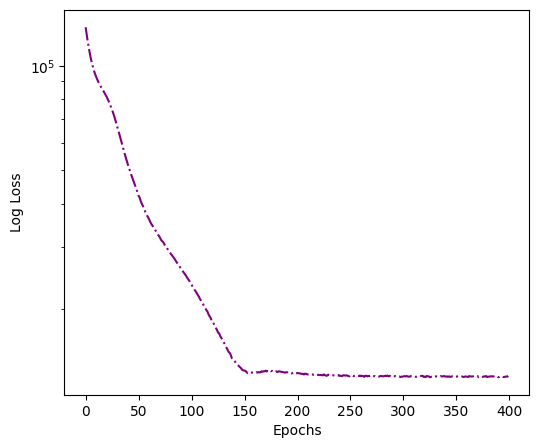

In [9]:
fig=plt.figure(figsize=(6, 5))
plt.plot(losses_tf, ls='-.', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.yscale('log')
plt.show()

In [10]:
print("Inferred axes:")
print(qw_mean)
print("Standard Deviation:")
print(qw_stddv)


Inferred axes:
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 1.4382384],
       [-0.7291816]], dtype=float32)>
Standard Deviation:
<TransformedVariable: name=softplus, dtype=float32, shape=[2, 1], fn="softplus", numpy=
array([[0.00627243],
       [0.00469655]], dtype=float32)>


In [ ]:
#plt.plot(losses)


In [11]:
posterior_samples = surrogate_posterior.sample(50)

print ('what is posterior samples:', type(posterior_samples),  )

_, _, x_generated = tf_model.sample(value=(posterior_samples))


print ('what is x_generated: ', type(x_generated), '\n',
       x_generated.shape)

x_generated_transpose =  tf.transpose(x_generated, [1, 0, 2])
print ('x_generated after transpose: ', type(x_generated_transpose), '\n',
       x_generated_transpose.shape)

x_generated_tp_reshape = tf.reshape(x_generated_transpose, (2, -1))


print ('x_generated after reshape: ', type(x_generated_tp_reshape), '\n',
       x_generated_tp_reshape.shape)

what is posterior samples: <class 'tensorflow_probability.python.internal.structural_tuple.structtuple.<locals>.StructTuple'>
what is x_generated:  <class 'tensorflow.python.framework.ops.EagerTensor'> 
 (50, 2, 5000)
x_generated after transpose:  <class 'tensorflow.python.framework.ops.EagerTensor'> 
 (2, 50, 5000)
x_generated after reshape:  <class 'tensorflow.python.framework.ops.EagerTensor'> 
 (2, 250000)


x_generated after selection:  <class 'tensorflow.python.framework.ops.EagerTensor'> 
 (2, 5000)


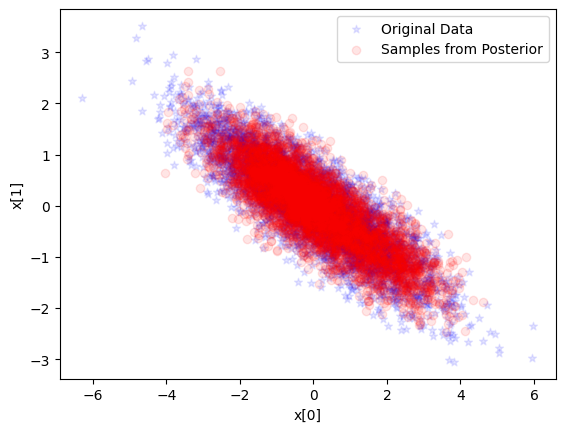

In [12]:



x_generated_tp_reshp_sel = x_generated_tp_reshape[:, ::50]

print ('x_generated after selection: ', type(x_generated_tp_reshp_sel), '\n',
       x_generated_tp_reshp_sel.shape)

plt.scatter(x_train[0, :], x_train[1, :],
            color='blue', alpha=0.1, label='Original Data', marker='*')
plt.scatter(x_generated_tp_reshp_sel[0, :], x_generated_tp_reshp_sel[1, :],
            color='red', alpha=0.1, label='Samples from Posterior', marker='o')
plt.xlabel('x[0]')
plt.ylabel('x[1]')
plt.legend()
plt.show()


In [45]:
print ('check version of tf: ', tf.__version__)
print ('check tf proba version: ', tfp.__version__)

check version of tf:  2.12.0
check tf proba version:  0.20.1
